# Project: Investigate FBI NICS Firearm Background Check Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Mandated by the Brady Handgun Violence Prevention Act of 1993 and launched by the FBI on November 30, 1998, NICS is used by Federal Firearms Licensees (FFLs) to instantly determine whether a prospective buyer is eligible to buy firearms or explosives. Before ringing up the sale, cashiers call in a check to the FBI or to other designated agencies to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. More than 100 million such checks have been made in the last decade, leading to more than 700,000 denials. Through the course of this report we will apply the data analysis workflow trying to find answers to the following questions:

- What census data is most associated with high gun per capita?
- What is the overall trend of gun purchases?
- Which states have had the highest growth in gun registrations?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load the gun data
gun = pd.read_excel('gun_data.xlsx')
# Load the census data
census = pd.read_csv('U.S. Census Data.csv')

#### General Properties - Guns Data

In [3]:
# Check the first 5 rows of gun data
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
# Check the last 5 rows of gun data
gun.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [5]:
# Get a summary of the available data points in terms of type and count
gun.info() # The below results show that the total number of records is 12485 and some attributes has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

#### General Properties - Census Data

In [6]:
# Check the first 5 rows of census data
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [7]:
# Check the last 5 rows of census data
census.tail() # The below results there are some rows with no facts and null values

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Get a summary of the available data points in terms of type and count
census.info() # The info data shows 80 facts while 65 of them contain info for the states which could be consistent with
# the previous cell findings about the rows with empty facts and data. This needs further investigations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

#### Data Cleaning - Guns Data

In [9]:
# From .info() command it is found that data is treated as object (Text) and numbers are in mixed format int/float
# Convert Date from text (Object) to date (datetime64[ns]) format
gun['month'] = pd.to_datetime(gun['month'])

In [10]:
# Fill NaN value with Zeros
gun = gun.fillna(0)

In [11]:
# Unify the numbers data type to float64 
# gun[gun.columns.to_list()[2:]] = gun[gun.columns.to_list()[2:]].apply(lambda x: x.astype('float64'))
gun[gun.columns[2:]] = gun[gun.columns[2:]].apply(lambda x: x.astype('float64'))

In [12]:
# Check the dataframe post the cleaning
gun.info() # Now the data and numbers format is proper, state data is left as object (Text), and finally no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null datetime64[ns]
state                        12485 non-null object
permit                       12485 non-null float64
permit_recheck               12485 non-null float64
handgun                      12485 non-null float64
long_gun                     12485 non-null float64
other                        12485 non-null float64
multiple                     12485 non-null float64
admin                        12485 non-null float64
prepawn_handgun              12485 non-null float64
prepawn_long_gun             12485 non-null float64
prepawn_other                12485 non-null float64
redemption_handgun           12485 non-null float64
redemption_long_gun          12485 non-null float64
redemption_other             12485 non-null float64
returned_handgun             12485 non-null float64
returned_long_gun            12485 non-null float64
r

#### Data Cleaning - Census Data

In [13]:
# Update the census dataframe to include only facts with data for states
# census = census.dropna(subset=census.columns.to_list()[2:])
census = census.dropna(subset=census.columns[2:])

In [14]:
# Check the dataframe again for NaN values
census.isna().sum() # Fact notes is the only column with null data which is normal and expected sence it is complementary
# and can be eliminated

Fact               0
Fact Note         49
Alabama            0
Alaska             0
Arizona            0
Arkansas           0
California         0
Colorado           0
Connecticut        0
Delaware           0
Florida            0
Georgia            0
Hawaii             0
Idaho              0
Illinois           0
Indiana            0
Iowa               0
Kansas             0
Kentucky           0
Louisiana          0
Maine              0
Maryland           0
Massachusetts      0
Michigan           0
Minnesota          0
Mississippi        0
Missouri           0
Montana            0
Nebraska           0
Nevada             0
New Hampshire      0
New Jersey         0
New Mexico         0
New York           0
North Carolina     0
North Dakota       0
Ohio               0
Oklahoma           0
Oregon             0
Pennsylvania       0
Rhode Island       0
South Carolina     0
South Dakota       0
Tennessee          0
Texas              0
Utah               0
Vermont            0
Virginia     

In [15]:
# Creating a subset of the dataframe contains 2016 data only since the data description mentioned Most variables just 
# have one data point per state (2016), but a few have data for more than one year.
census = census[census['Fact'].str.endswith('(V2016)')].reset_index(drop=True)

In [16]:
# Fact Note Column contains no useful information, will be removed
census = census.drop(columns='Fact Note')

In [17]:
# Since all the census data type is object (text), we need the numbers data in numerical format like float to analyze it
# Below are the steps used to achieve that:

# Step 1: remove the % from the percentage data
census[census.columns[1:]] = census[census.columns[1:]].apply(lambda x: x.str.strip("%"))

# Step 2: remove the , from the comma separated data
census[census.columns[1:]] = census[census.columns[1:]].apply(lambda x: x.str.replace(',', ''))

# Step 3: some records represented the 0 with z, replace it with 0
census[census.columns[1:]] = census[census.columns[1:]].replace("Z", "0")
census[census.columns[1:]] = census[census.columns[1:]].apply(lambda x: x.astype('float64'))

In [18]:
# Final data type check
census.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 51 columns):
Fact              16 non-null object
Alabama           16 non-null float64
Alaska            16 non-null float64
Arizona           16 non-null float64
Arkansas          16 non-null float64
California        16 non-null float64
Colorado          16 non-null float64
Connecticut       16 non-null float64
Delaware          16 non-null float64
Florida           16 non-null float64
Georgia           16 non-null float64
Hawaii            16 non-null float64
Idaho             16 non-null float64
Illinois          16 non-null float64
Indiana           16 non-null float64
Iowa              16 non-null float64
Kansas            16 non-null float64
Kentucky          16 non-null float64
Louisiana         16 non-null float64
Maine             16 non-null float64
Maryland          16 non-null float64
Massachusetts     16 non-null float64
Michigan          16 non-null float64
Minnesota         16 non

In [19]:
# Since all the facts are 2016 related, will adjust the "Fact" representation text abit
census['Fact'] = census['Fact'].apply(lambda x: " ".join(x.rsplit(",")[:-3]))

In [20]:
# Inspecting how the "Fact" column looks post the edit
census

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Population estimates,4863300.0,741894.0,6931071.0,2988248.0,39250017.0,5540545.0,3576452.0,952065.0,20612439.0,...,865454.000,6651194.000,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0
1,Population estimates base,4780131.0,710249.0,6392301.0,2916025.0,37254522.0,5029324.0,3574114.0,897936.0,18804592.0,...,814195.000,6346298.000,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0,563767.0
2,Population percent change - April 1,1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,9.6,...,0.063,0.048,10.8,10.4,-0.2,5.1,8.4,-1.2,1.6,3.9
3,Persons under 5 years percent,6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,5.5,...,0.071,0.061,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5
4,Persons under 18 years percent,22.6,25.2,23.5,23.6,23.2,22.8,21.1,21.5,20.1,...,0.246,0.226,26.2,30.2,19.0,22.2,22.4,20.5,22.3,23.7
5,Persons 65 years and over percent,16.1,10.4,16.9,16.3,13.6,13.4,16.1,17.5,19.9,...,0.160,0.157,12.0,10.5,18.1,14.6,14.8,18.8,16.1,15.0
6,Female persons percent,51.6,47.7,50.3,50.9,50.3,49.7,51.2,51.6,51.1,...,0.496,0.512,50.4,49.7,50.6,50.8,50.0,50.5,50.3,48.9
7,White alone percent,69.3,66.1,83.3,79.4,72.7,87.5,80.6,70.1,77.6,...,0.852,0.787,79.4,91.1,94.6,70.0,80.0,93.6,87.5,92.8
8,Black or African American alone percent,26.8,3.8,4.9,15.7,6.5,4.5,11.8,22.6,16.8,...,0.020,0.171,12.6,1.4,1.3,19.8,4.1,3.6,6.6,1.3
9,American Indian and Alaska Native alone percent,0.7,15.2,5.4,1.0,1.7,1.6,0.5,0.6,0.5,...,0.090,0.004,1.0,1.6,0.4,0.5,1.9,0.2,1.1,2.7


#### Data Cleaning - Create a Merged dataframe with census data and an aggregated picked set of guns registeration data

In [21]:
# Step 1: Create an aggregated dataframe (For the whole period since 1998 to 2017) for gun data contains 
# the total permits, permit recheck, and the total registrations
gun_aggregated = gun[['month', 'state', 'permit', 'permit_recheck', 'totals']].copy().groupby(['state']).sum()

In [22]:
# Step 2: Transpose the Census Data and adjust the columns row
census_transposed = census.T
census_transposed.columns = census_transposed.iloc[0]
census_transposed = census_transposed.drop(census_transposed.index[0])
census_transposed = census_transposed.astype('float64')

In [23]:
# Step 3: Check if the Number of states are the same
print("Does the two datasets contain the same number of states? {}".format(len(census_transposed.index) == len(gun_aggregated.index))) # Since the number of states are not equal, we expect to find Nan value in the combined set
print("Census data states count {}\nFBI data states count {}".format(len(census_transposed.index),  len(gun_aggregated.index)))

Does the two datasets contain the same number of states? False
Census data states count 50
FBI data states count 55


In [24]:
# Step 4: Join the two sets based on the inedx (states), will consider joinging the census data to the FBI data to keep the full set
combined_set = gun_aggregated.join(census_transposed)
# Sort data based on total gun registration from the high to low
combined_set = combined_set.sort_values('totals', ascending=False)
combined_set # It turned out that the lowest 5 states in terms of gun sales are the states with no census data

,permit,permit_recheck,totals,Population estimates,Population estimates base,Population percent change - April 1,Persons under 5 years percent,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,White alone percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Two or More Races percent,Hispanic or Latino percent,White alone not Hispanic or Latino percent,Housing units
state,,,,,,,,,,,,,,,,,,,
Kentucky,24926779.0,0.0,29762434.0,4436974.0,4339344.0,2.200,6.200,22.800,15.600,50.700,88.000,8.300,0.300,1.500,0.100,1.900,3.500,85.000,1965556.0
Texas,2857582.0,0.0,19435186.0,27862596.0,25146100.0,10.800,7.200,26.200,12.000,50.400,79.400,12.600,1.000,4.800,0.100,1.900,39.100,42.600,10753629.0
California,6530543.0,0.0,19014063.0,39250017.0,37254522.0,5.400,6.300,23.200,13.600,50.300,72.700,6.500,1.700,14.800,0.500,3.800,38.900,37.700,14060525.0
Illinois,9498639.0,1141319.0,15471534.0,12801539.0,12831574.0,-0.200,6.000,22.900,14.600,50.900,77.200,14.700,0.600,5.500,0.100,1.900,17.000,61.700,5326970.0
Pennsylvania,1496008.0,0.0,13133876.0,12784227.0,12702857.0,0.006,0.056,0.209,0.174,0.510,0.824,0.118,0.004,0.035,0.001,0.019,0.070,0.770,5612002.0
Florida,1088802.0,0.0,11695777.0,20612439.0,18804592.0,9.600,5.500,20.100,19.900,51.100,77.600,16.800,0.500,2.900,0.100,2.100,24.900,54.900,9301642.0
Ohio,372281.0,3323.0,8462744.0,11614373.0,11536727.0,0.007,0.060,0.225,0.162,0.510,0.825,0.128,0.003,0.022,0.001,0.022,0.037,0.795,5164361.0
North Carolina,3872974.0,0.0,7777689.0,10146788.0,9535688.0,0.064,0.060,0.227,0.155,0.514,0.710,0.222,0.016,0.029,0.001,0.022,0.092,0.635,4540498.0
Indiana,2965760.0,0.0,7737172.0,6633053.0,6484136.0,2.300,6.400,23.800,14.900,50.700,85.600,9.700,0.400,2.200,0.100,2.000,6.800,79.600,2854546.0


In [25]:
# Step 5: Create a set contains the 50 states with census data and drop the lowest 5
combined_set.dropna(inplace=True)
combined_set

,permit,permit_recheck,totals,Population estimates,Population estimates base,Population percent change - April 1,Persons under 5 years percent,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,White alone percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Two or More Races percent,Hispanic or Latino percent,White alone not Hispanic or Latino percent,Housing units
state,,,,,,,,,,,,,,,,,,,
Kentucky,24926779.0,0.0,29762434.0,4436974.0,4339344.0,2.200,6.200,22.800,15.600,50.700,88.000,8.300,0.300,1.500,0.100,1.900,3.500,85.000,1965556.0
Texas,2857582.0,0.0,19435186.0,27862596.0,25146100.0,10.800,7.200,26.200,12.000,50.400,79.400,12.600,1.000,4.800,0.100,1.900,39.100,42.600,10753629.0
California,6530543.0,0.0,19014063.0,39250017.0,37254522.0,5.400,6.300,23.200,13.600,50.300,72.700,6.500,1.700,14.800,0.500,3.800,38.900,37.700,14060525.0
Illinois,9498639.0,1141319.0,15471534.0,12801539.0,12831574.0,-0.200,6.000,22.900,14.600,50.900,77.200,14.700,0.600,5.500,0.100,1.900,17.000,61.700,5326970.0
Pennsylvania,1496008.0,0.0,13133876.0,12784227.0,12702857.0,0.006,0.056,0.209,0.174,0.510,0.824,0.118,0.004,0.035,0.001,0.019,0.070,0.770,5612002.0
Florida,1088802.0,0.0,11695777.0,20612439.0,18804592.0,9.600,5.500,20.100,19.900,51.100,77.600,16.800,0.500,2.900,0.100,2.100,24.900,54.900,9301642.0
Ohio,372281.0,3323.0,8462744.0,11614373.0,11536727.0,0.007,0.060,0.225,0.162,0.510,0.825,0.128,0.003,0.022,0.001,0.022,0.037,0.795,5164361.0
North Carolina,3872974.0,0.0,7777689.0,10146788.0,9535688.0,0.064,0.060,0.227,0.155,0.514,0.710,0.222,0.016,0.029,0.001,0.022,0.092,0.635,4540498.0
Indiana,2965760.0,0.0,7737172.0,6633053.0,6484136.0,2.300,6.400,23.800,14.900,50.700,85.600,9.700,0.400,2.200,0.100,2.000,6.800,79.600,2854546.0


### Data Wrangling Results:
> - gun: dataframe with Full FBI Gun Registration data for the period between 2008 and 2017 (cleaned)
> - census: dataframe with census data for year 2016 version (cleaned)
> - combined_set: dataframe with census data for year 2016 version and an aggregated picked set of guns registeration data

<a id='eda'></a>
## Exploratory Data Analysis

### 1- What census data is most associated with high gun per capita?

In [26]:
# To have a flavour about the available parameters, we can show a full data describtion
combined_set.describe()

,permit,permit_recheck,totals,Population estimates,Population estimates base,Population percent change - April 1,Persons under 5 years percent,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,White alone percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Two or More Races percent,Hispanic or Latino percent,White alone not Hispanic or Latino percent,Housing units
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,1.598168e+06,2.565104e+04,5.387840e+06,6.448927e+06,6.163127e+06,3.120700,4.696780,17.425780,11.81044,38.511740,60.397020,8.360900,1.18026,3.63118,0.360360,2.310400,8.874680,52.779080,2.707684e+06
std,3.795039e+06,1.612844e+05,5.656682e+06,7.271769e+06,6.848463e+06,3.366857,2.697349,9.936137,6.84738,21.584467,35.861896,9.917937,2.36307,5.79106,1.444674,3.389157,9.805721,32.872755,2.813244e+06
min,0.000000e+00,0.000000e+00,1.975800e+05,5.855010e+05,5.637670e+05,-1.200000,0.052000,0.197000,0.14500,0.487000,0.685000,0.020000,0.00300,0.01500,0.000000,0.018000,0.036000,0.381000,2.706000e+05
25%,9.468525e+04,0.000000e+00,1.769879e+06,1.850106e+06,1.833003e+06,0.069250,4.825000,19.025000,10.42500,48.000000,34.175000,0.650000,0.22500,0.80000,0.002000,1.300000,1.525000,26.000000,8.420270e+05
50%,4.431055e+05,0.000000e+00,3.883532e+06,4.559320e+06,4.436412e+06,2.050000,6.000000,22.250000,15.00000,50.300000,77.400000,4.700000,0.60000,2.35000,0.100000,2.000000,6.250000,62.050000,2.001266e+06
75%,1.489000e+06,7.065000e+02,6.666814e+06,7.198768e+06,6.680362e+06,5.075000,6.400000,23.450000,16.10000,50.900000,87.275000,12.400000,1.17500,4.55000,0.100000,2.475000,11.575000,79.600000,3.009514e+06
max,2.492678e+07,1.141319e+06,2.976243e+07,3.925002e+07,3.725452e+07,10.800000,8.300000,30.200000,19.90000,51.600000,94.800000,37.700000,15.20000,37.70000,10.200000,23.700000,39.100000,93.500000,1.406052e+07


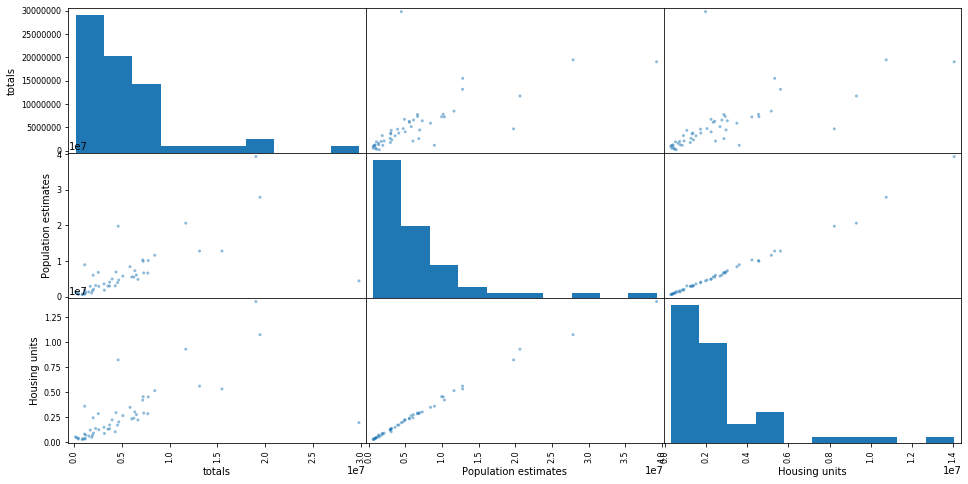

In [27]:
# I will start by investigating the main three parameters, 'totals', 'Population estimates', 'Housing units' since they 
# are a good representation for the whole dataset
pd.plotting.scatter_matrix(combined_set[['totals', 'Population estimates', 'Housing units']], figsize=(16,8));

### The previous figure suggests:
 - A moderate positive correlation between total guns registration with population estimates and housing units
 - We would normally expect a strong positive correlation between population estimates and housing units

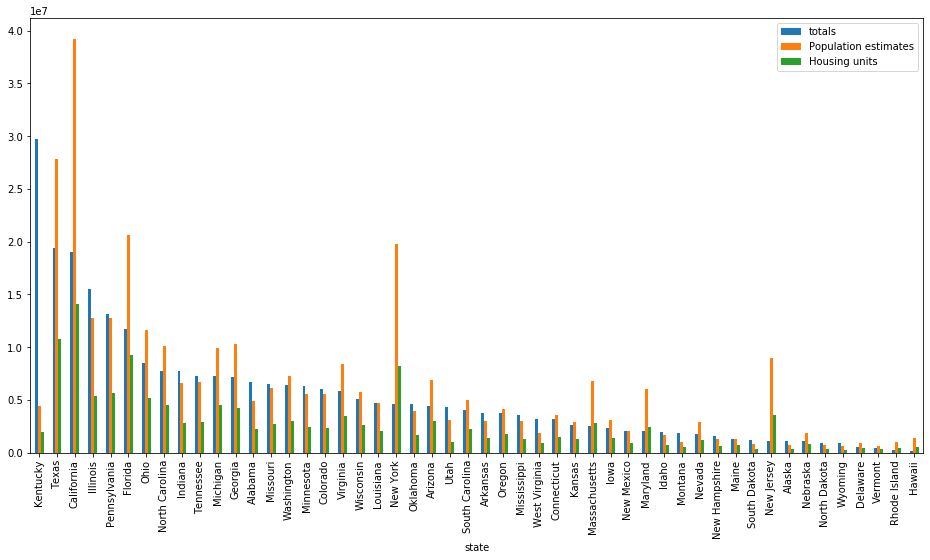

In [28]:
# using the bar plot for the three main parameters, 'totals', 'Population estimates', 'Housing units' can help in confirming
# the presence of the correlation
combined_set[['totals', 'Population estimates', 'Housing units']].plot(kind="bar", figsize=(16,8));

### The previous figure illustrates that after investigating the three parameters on a bar plot, it come up that the correlation didn't hold specially in the highest counts states as following:
 - While Kentuchky has the highest gun registration by far, it has relatively less population and housing units
 - In California which is the state with the highest population, guns registration is less than Kentuchky state

In [29]:
# We will use the "combined_set" dataframe calculate the Gun-Per-Capita
# Step 1: Calculate the Gun-Per-Capita
combined_set['Gun-Per-Capita'] = combined_set['totals'] / combined_set['Population estimates']

In [30]:
# Step 2: Sort data based on total Gun-Per-Capita from the high to low
combined_set = combined_set.sort_values('Gun-Per-Capita', ascending=False)

In [31]:
# Step 3: Communicate the answer through a message
print('\nThe highest Gun-Per-Capita is in {} state with {:.2f} guns/person\n'.format(combined_set.index[0], combined_set.iloc[0,-1]))


The highest Gun-Per-Capita is in Kentucky state with 6.71 guns/person



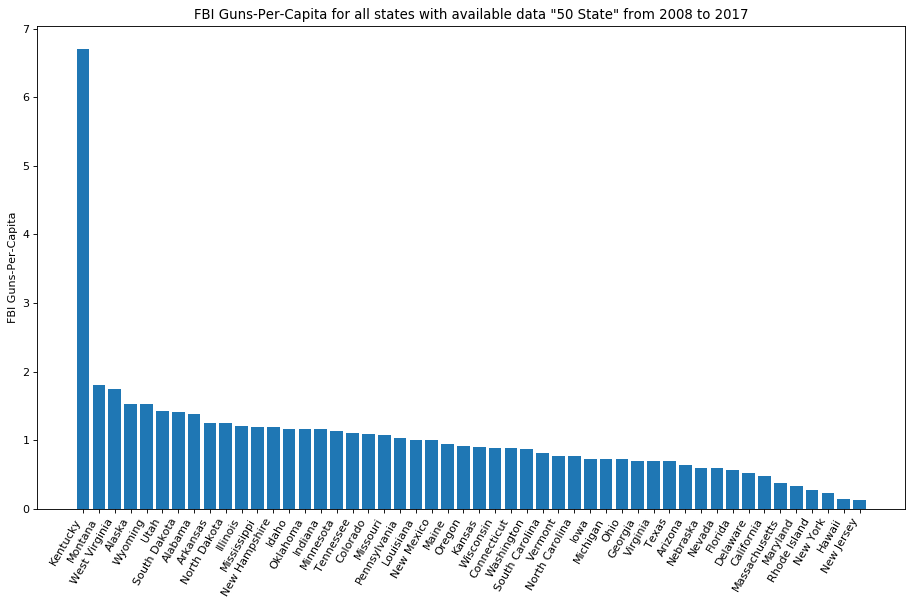

In [32]:
# Step 4: Communicate the answer through a plot
plt.figure(figsize=(14,8), dpi= 80);
plt.bar(combined_set.index, combined_set['Gun-Per-Capita']);
plt.gca().set_xticklabels(combined_set.index, rotation=60, horizontalalignment= 'right');
plt.ylabel('FBI Guns-Per-Capita');
plt.title('FBI Guns-Per-Capita for all states with available data "50 State" from 2008 to 2017');

### 2- What is the overall trend of gun purchases?

In [33]:
# to get the overall trend of gun puchase, we need to aggregate all states data by date as following
gun_aggregated_total = gun.groupby(['month'], as_index=False).sum()

In [34]:
# The below function will use the slope of a linear equation as an indicator for increasing trend (+ve) 
# or decreasing trend (-ve) or Plateau if slope is 0
# The best fit for the data will be achieved using numpy polyfit (polynomial of 1st degree) to get a linear equation fit
# The function will also print a message with the trend result and plot the data and trend fit

def trend(df_name, column_name, poly_order=1):
    # Extract X and Y Data to be fitted
    x_data = df_name.index
    y_data = df_name[column_name]
    
    # Apply the fit and get the slope and intercept
    fit_coefficients = np.polyfit(x_data, y_data, poly_order)
    slope = fit_coefficients[0]
    intercept = fit_coefficients[1]
    
    # create a column with the fitted trend
    df_name['fit_trend'] = (df_name.index*slope) + intercept
    
    # Communicating the answer through a plot
    plt.figure(figsize=(12,8), dpi= 80);
    plt.plot(df_name['month'], df_name['totals'], label='Total Gun Register Data');
    plt.plot(df_name['month'], df_name['fit_trend'], 'r--', label='Data Trend');
    plt.ylabel('Total Guns Registration');
    plt.title('FBI Total Guns Registration from 2008 to 2017');
    plt.legend();
    
    # Result Message
    if slope > 0:
        trend_type = "Increasing Trend"
    elif slope == 0:
        trend_type = "Plateau"
    else:
        trend_type = "Decreasing Trend"
    print("The overall trend of gun purchases in the USA from 2008 to 2017 is {}".format(trend_type))

The overall trend of gun purchases in the USA from 2008 to 2017 is Increasing Trend


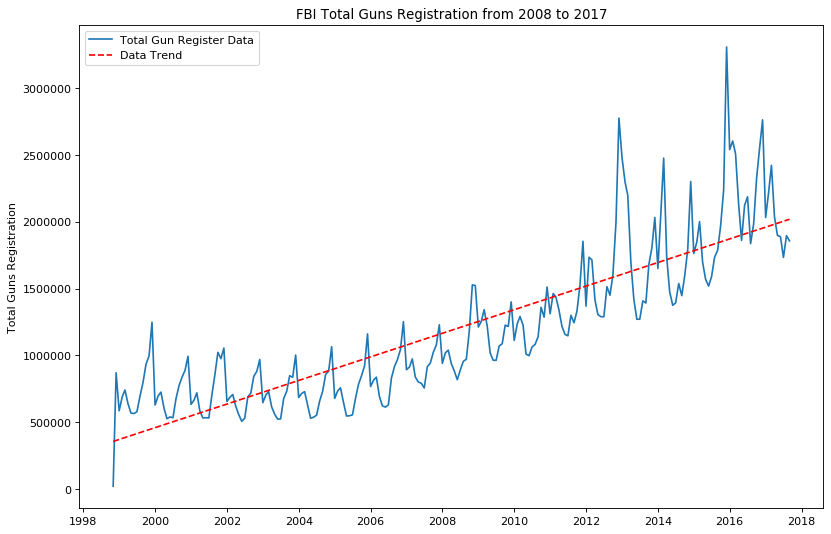

In [35]:
# Call the trend function to get the answers
trend(gun_aggregated_total, 'totals')

### 3- Which states have had the highest growth in gun registrations?

In [36]:
# To get an answer for this question we need to get the difference between the minimum and maximum gun registeration per 
# each state through the period from 2008 to 2017
# Step 1: Get the minimum registration
min_state_registration = gun.groupby(['state'], as_index=False)['totals'].min()
min_state_registration.rename(columns={'totals': 'Minimum'}, inplace=True)

# Step 2: Get the maximum registration
max_state_registration = gun.groupby(['state'], as_index=False)['totals'].max()
max_state_registration.rename(columns={'totals': 'Maximum'}, inplace=True)

# Step 3: Merge them in a new dataframe
combined_states_stats = pd.merge(min_state_registration,max_state_registration,on='state')

# Step 4: Calculate the difference
combined_states_stats['Growth'] = combined_states_stats['Maximum'] - combined_states_stats['Minimum']
combined_states_stats.sort_values('Growth', ascending=False, inplace=True)
combined_states_stats.reset_index(drop=True, inplace=True)

# Step 5: Communicate the answer through a message
print('\nThe highest growth in gun registrations was in {} state\n'.format(combined_states_stats.iloc[0]['state']))


The highest growth in gun registrations was in North Carolina state



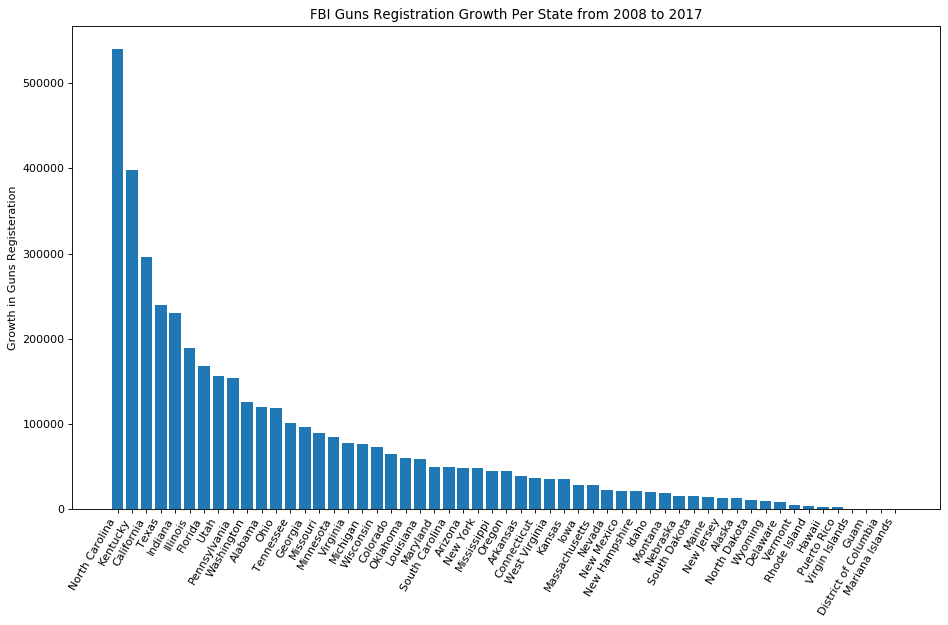

In [37]:
# Step 6: Communicate the answer through a plot
plt.figure(figsize=(14,8), dpi= 80);
plt.bar(combined_states_stats['state'], combined_states_stats['Growth']);
plt.gca().set_xticklabels(combined_states_stats['state'], rotation=60, horizontalalignment= 'right');
plt.ylabel('Growth in Guns Registeration');
plt.title('FBI Guns Registration Growth Per State from 2008 to 2017');

<a id='conclusions'></a>
## Conclusions

After investigating the FBI NICS Firearm Background Check Data for the period from 2008 to 2017, the below summerizes the limitations and findings:

### Limitations
 - The provided census data has a full set only for year 2016 and consequently all the below findings are based on that year numbers
 - The census data covers 50 states out of 55 state in the FBI gun data
 - A more complete set of census data could provide a more in-depth investigations through the different years

### Findings
 - Despite the presence of moderate positive correlation between total guns registration with population estimates and housing units, this trend didn't hold for neither the state with the highest population estimates (California) nor the state with the highest gun registration (Kentucky)
 - The highest Gun-Per-Capita is in Kentucky state with 6.71 guns/person
 - The overall trend of gun purchases in the USA is Increasing Trend
 - The highest growth in gun registrations was in North Carolina state
